<h1 style="color:rgb(0,120,170)">Assignment 1: k-nearest neighbors</h1>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. You may notice that all cells are tagged such that the unittest routine can recognise them. Before you sumbit your solution, make sure every cell has its (correct) tag!

You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

<h2 style="color:rgb(0,120,170)">Plagiarism</h2>

Your submissions will be scanned for plagiarism! \
If plagiarism is detected, all involved students will automatically receive 0 points for the whole submission, until further explanation is brought forward to us.

<h2 style="color:rgb(0,120,170)">Task 1: Risk Calulation (10 Points)</h2>

Assume the simple situation of a binary classification task, i.e. $y = \pm 1$, and a 1-dimensional feature $x$, i.e. $d=1$. Moreover, the feature is discrete (categorical) and can only have 3 possible values $x=1,2,3$.

Data is drawn from the following distribution:

\begin{align}
p(x=1,y=+1) &= 0.1\\
p(x=1,y=-1) &= 0.2\\
p(x=2,y=+1) &= 0.2\\
p(x=2,y=-1) &= 0.1\\
p(x=3,y=+1) &= 0.3\\
p(x=3,y=-1) &= 0.1\\
\end{align}

Compute the risk for the 0-1-loss for these two classifiers:

(1) The Bayes-optimal classifier $g_\textrm{opt}$.<br>
(2) A classifier $g_\textrm{dom}$ which always outputs $+1$, i.e. the dominant label, independent of $x$.

<h2 style="color:rgb(0,120,170)">Task 2: Visualization</h2>

In [4]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.collections import PathCollection

In [5]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=';')
X, y = Z[:,:-1], Z[:,-1]

<h3 style="color:rgb(210,90,80)">Task 2.1:</h3>

Now visualize the data stored in `DataSet1.csv` with a scatter plot.<br>
The first two columns are the features which hold the $x_1$ and $x_2$ coordinates of the data.<br>
The last column provides the labels $y$ ($\pm1$) of the data. Use different colors for different labels.<br>
Always label the axes of all your plots.

<h3 style="color:rgb(210,90,80)">Code & Question 2.1 (5 points):</h3>

### Plotting

Visualize the data stored in `DataSet1.csv` with a scatter plot by filling out the function below.
Make sure to only use function-parameters in your plot.

In [6]:
def scatter_plot(X, y):
    """creates a scatter-plot for the dataset X with labels y

    Parameters
    ----------
    X : np.ndarray
        data
    y : np.ndarray
        labels

    Returns
    -------
    Figure
        a matplotlib figure object
    """
    fig = plt.figure()
    # your code goes here ↓↓↓
    X_1 = X[y == 1]    #boolean mask on features
    X_2 = X[y == -1]
    plt.scatter(X_1[:, 0], X_1[:, 1], c='y', label='y=1')
    plt.scatter(X_2[:, 0], X_2[:, 1], c='m', label='y=-1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Scatter Plot')
    plt.legend()
    return fig

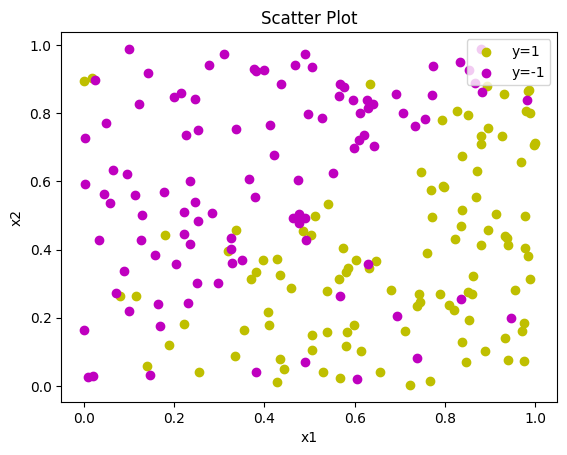

In [7]:
fig = scatter_plot(X, y)
assert isinstance(fig, Figure)

***Answer the following yes/no questions concerning the distribution of the data:***<br>

**Are the two classes linearly seperable?**<br>

a_) Yes<br>
b_) No<br>

**Are there any outliers?**<br>

c_) Yes<br>
d_) No<br>

<!--- **Would outliers affect a kNN algorithm if k is small (<= 2)?**<br> 
e_) Yes<br>
f_) No<br> --->

**Outliers would affect a kNN algorithm when k is ...?**<br>

e_) large (>2)<br>
f_) small (<=2)<br>


To answer the question assign to variables in the next cell "True" or "False" boolean values. 
To earn points, assign values to all variables. Note: Do not reuse these variable names. They are used for testing.

In [8]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
a_ = True
b_ = False

c_ = True
d_ = False

e_ = False
f_ = True

<h3 style="color:rgb(210,90,80)">Question 2.2 (5 points):</h3>

***Which of the following statements about $k$-nearest neighbors are correct?***<br>
(Multiple answers might be correct)

g_) requires very long training time already for small data sets <br>
h_) not suited for large datasets<br>
i_) sensitive to the rescaling of individual features (individual dimensions of feature vectors)<br>
j_) has many trainable model parameters <br>
k_) k-NN only allows for classification, not for regression <br>

In [9]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
g_ = False
h_ = True
i_ = True
j_ = False
k_ = False

<h2 style="color:rgb(0,120,170)">Task 3: Training the model</h2>

Now we want to put the kNN into action. To this end, work through the following points

* Implement `train_kNN` which fits newly created instance of `KNeighborsClassifier` (`sklearn`) to some training data
* Complete `eval_kNN`such that it outputs the prediction for some input data using a passed classifier
* Program the function `mean_zero_one_loss` that calculates the mean zero-one loss (see lecture slides) of predicted values and samples from the test set
* Put all of these functions together in `run_kNN` to fit a model to training data, make predictions on left-out (test) data and compute the loss for these predictions. To split the dataset into training and test sets, use 10-fold cross validation (CV), loop over all the splits and collect the mean error for each split.

At the end of this task, visualize the mean error for $k \in \{1,3,5,...,177,179\}$ in a plot and answer the following questions.

In [10]:
from sklearn.model_selection import KFold
from sklearn import neighbors

<h3 style="color:rgb(210,90,80)">Code 3.1 (5 points):</h3>

In [11]:
def train_kNN(X_train,y_train,k_train): 
    """
    Function that fits a kNN to given data
    @param X_train, np array, training data
    @param y_train, np array, training labels
    @param k_train, integer, k for the kNN

    @output classifier, kNN instance, classifier that was fitted to training data
    """
    #your code goes here ↓↓↓
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k_train)
    classifier.fit(X_train, y_train)
    return classifier 

<h3 style="color:rgb(210,90,80)">Code 3.2 (5 points):</h3>

In [12]:
def eval_kNN(classifier, X_eval): 
    """
    Function that returns predictions for some input data
    @param classifier, kNN instance, trained kNN classifier
    @param X_eval, np array, data that you want to predict the labels for

    @output predicitons, np array, predicted labels
    """
    #your code goes here ↓↓↓
    predictions = classifier.predict(X_eval)
    return predictions

<h3 style="color:rgb(210,90,80)">Code 3.3 (5 points):</h3>

In [13]:
def mean_zero_one_loss(y_true, y_pred):
    """
    Function that calculates the mean zero-one loss for given true and predicted labels
    @param y_true, np array, true labels
    @param y_pred, np array, predicted labels

    @output loss, float, mean zero-one loss
    """
    #your code goes here ↓↓↓
    loss_01 = []
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label != pred_label:
            loss_01.append(1.0)
        else:
            loss_01.append(0.0)

    loss = sum(loss_01) / float(len(y_true))
    return loss

<h3 style="color:rgb(210,90,80)">Code 3.4 (5 points):</h3>

In [14]:
def run_kNN(X,y,nf,k):
    """
    Function that combines all functions using CV
    @param X, np array, training data
    @param y, np array, training labels
    @param nf, integer, number of folds for CV
    @param k, integer, k for kNN

    @output mean_error, float, mean error over all folds
    """
    #your code goes here ↓↓↓
    kf = KFold(n_splits=nf)
    mean_errors = []

    for train_i, test_i in kf.split(X):
        X_train, X_test = X[train_i], X[test_i]
        y_train, y_test = y[train_i], y[test_i]
        classifier = train_kNN(X_train, y_train, k)
        predictions = eval_kNN(classifier, X_test)
        mean_errors.append(mean_zero_one_loss(y_test, predictions))
    mean_error = sum(mean_errors) / float(len(mean_errors))
    return mean_error

In [15]:
# Nothing to do here - just run this cell
m = 179
nf = 10
error_holder = []
for k in range(1,m+1,2): #range with 179 included and step of 2
    error_holder.append(run_kNN(X,y,nf,k))

<h3 style="color:rgb(210,90,80)">Code & Question 3.5 (5 points):</h3>

In [16]:
#implement the plot as described in the task description within the function below

def plot_error_vs_k(error_holder, m):
    """create a plot

    Parameters
    ----------
    error_holder : list[float]
        the error list generated bove
    m : int
        range in the error list (see above)

    Returns
    -------
    Figure
        matplotlib figure object
    """
    fig = plt.figure(figsize=(12, 6)) 
    # your code goes here ↓↓↓
    k_vals = range(1, m+1, 2)
    plt.plot(k_vals, error_holder)
    plt.xlabel('k-value')
    plt.ylabel('error-value')
    return fig

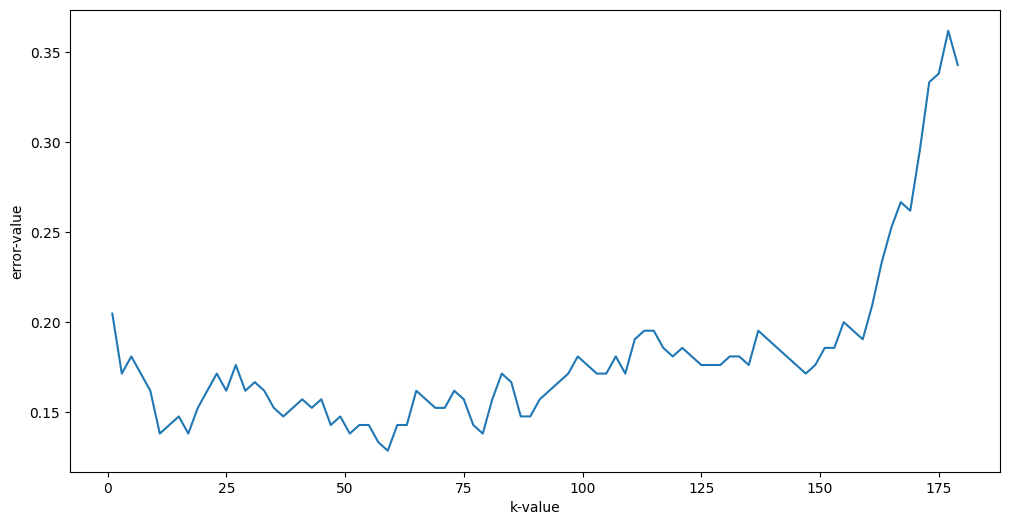

In [17]:
fig = plot_error_vs_k(error_holder, m)
assert isinstance(fig, Figure)
plt.show()

***Answer the following questions about the plot you just created:***<br>

What range for $k$ holds the lowest errors (on average) - by visual inspection?<br>

l_) [0,5]<br>
m_) [50,60]<br>
n_) [150,175]<br>

Is the error larger for $k=175$ or for $k=1$?<br>

o_) 175<br>
p_) 1<br>

In [18]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
l_ = False
m_ = True
n_ = False

o_ = True
p_ = False

<h3 style="color:rgb(210,90,80)">Question 3.6 (10 points):</h3>

<i><b>Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ leads to complex models? Why?</b></i><br>
(Multiple answers might be correct)

q_) Model complexity increases with increasing $k$, as larger $k$ means the model has more parameters. <br>
r_) Model complexity increases with increasing $k$, as larger $k$ means that more neighbors influence the decision. <br>
s_) Model complexity increases with decreasing $k$, as smaller $k$ means that fewer neighbors influence the decision. <br>
t_) Model complexity increases with decreasing $k$, as smaller $k$ means the model has fewer parameters. <br>

u_) Very small values of $k$ lead to underfitting <br>
v_) Very small values of $k$ lead to overfitting <br>
w_) Very large values of $k$ lead to underfitting <br>
x_) Very large values of $k$ lead to overfitting <br>

In [19]:
#your answers go here ↓↓↓
q_ = False
r_ = False
s_ = True
t_ = False

u_ = False
v_ = True
w_ = True
x_ = False

<h2 style="color:rgb(0,120,170)">Task 4: Adding noise to dataset</h2>

To make things more interesting, mix up the dataset a bit:

* Implement `generate_flip_vector` which should return a 1-dimensional array of length $n$ where exactly $\left \lfloor{n/5}\right \rfloor $ entries are $-1$ and the rest are $+1$. The entries in the array should appear in a random order.
* Now implement `flip_labels` that flips the labels according to the flip vector.


Then perform the same steps as before. Generate the following 4 subplots in one big plot:  
(1) top left: visualize the original dataset (with data points colored differently according to the binary labels)  
(2) top right: visualize the flipped dataset (with data points colored differently according to the binary labels)  
(3) bottom left: visualize the mean error for $k \in \{1,3,5,...,177,179\}$ (same as in Task 2) for the original dataset  
(4) bottom right: visualize the mean error for $k \in \{1,3,5,...,177,179\}$ (same as in Task 2) for the flipped dataset  

plot the data and plot the error (estimated via the empirical risk) vs. $k$ for 10-fold cross validation.

<h3 style="color:rgb(210,90,80)">Code 4.1 (5 points):</h3>

In [20]:
def generate_flip_vector(n):
    """
    Function that produces a flip vector consisting of -1's and 1's (1/5,4/5)
    @param n, integer, the length of the vector that should be returned

    @output flip_vector, np array, the vector that indicates what labels will be flipped
    """
    #your code goes here ↓↓↓
    flip_vector = np.zeros(n)
    for i in range(n):
        flip_vector[i] = 1
    for i in range(int(n/5)):
        flip_vector[i] = -1
    np.random.shuffle(flip_vector)
    return flip_vector

<h3 style="color:rgb(210,90,80)">Code 4.2 (5 points):</h3>

In [21]:
def flip_labels(y,flip_vector):
    """
    Function that flips labels given a flip vector
    @param y, np array, labels to flip (don't forget to copy the data in order not to alter the original labels). Note that y is of the same length as the flip vector.
    @param flip_vector, np array, array that should be used to flip the labels

    @output flipped_labels, np array, the labels where 1/5 labels are flipped
    """
    #your code goes here ↓↓↓
    flipped_labels = y.copy()
    for i in range(len(y)):
        if flip_vector[i] == -1:
            flipped_labels[i] = -flipped_labels[i]
    return flipped_labels

In [22]:
# Nothing to do here - just run this cell
# define new y vector by calling flip function
fl_vec = generate_flip_vector(len(y))
y_fl = flip_labels(y,fl_vec)

error_holder_flipped = []
for k in range(1,m+1,2): # range with 179 included and step of 2
    error_holder_flipped.append(run_kNN(X,y_fl,nf,k))

<h3 style="color:rgb(210,90,80)">Plot & Question 4.3 (10 points)</h3>

In [23]:
def plot_subplots(X, y, y_fl, m, error_holder, error_holder_flipped):
    """The function creating the plots as described above.

    The Parameters are called the same as in the notebook.
    Do not use anything besides them.
    """
    fig, axs = plt.subplots(2,2,figsize=(14, 14), gridspec_kw = {'wspace':0.15,'hspace':0.3})
    #your plotting code goes here ↓↓↓
    axs[0,0].scatter(X[:,0], X[:,1], c=y)
    axs[0,0].set_title('Original Dataset')
    axs[0,1].scatter(X[:,0], X[:,1], c=y_fl)
    axs[0,1].set_title('Flipped Dataset')
    k_vals = range(1,m+1,2)
    axs[1,0].plot(k_vals, error_holder)
    axs[1,0].set_title('Original Dataset')
    axs[1,0].set_xlabel('k-value')
    axs[1,0].set_ylabel('error-value')
    axs[1,1].plot(k_vals, error_holder_flipped)
    axs[1,1].set_title('Flipped Dataset')
    axs[1,1].set_xlabel('k-value')
    axs[1,1].set_ylabel('error-value')
    return fig

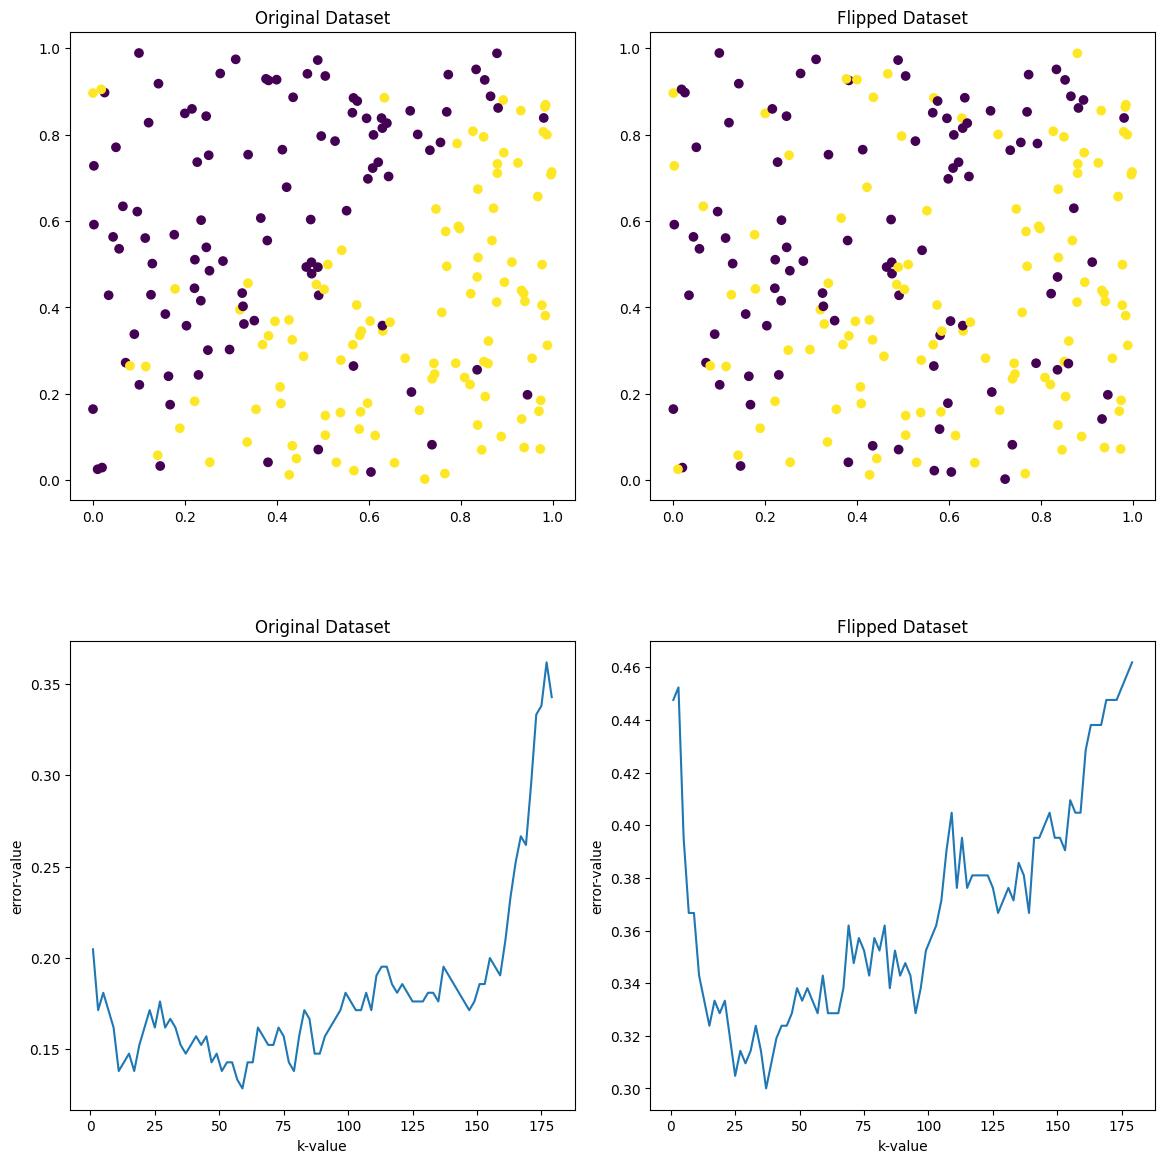

In [24]:
fig = plot_subplots(X, y, y_fl, m, error_holder, error_holder_flipped)
assert isinstance(fig, Figure)
plt.show()

***Which differences do you observe?<br>
Which conclusions do you draw from that?***
<br>(Multiple answers might be correct)


y_) After flipping, the two classes are well separable and have nearly no overlap anymore <br>
z_) After flipping, the two classes are less separable (than before) and have a larger overlap (than before) <br>

a2_) Random label flipping brings noise into the data <br>
b2_) Random label flipping simply swaps data, but does not add noise <br>

c2_) Overall, the error remains nearly unchanged compared to the original data set. <br>
d2_) Overall, the error increases compared to the original data set. <br>

To answer the question assign to variables in the next cell "True" or "False" boolean values. To earn points, assign values to all variables. Note: Do not reuse these variable names. They are used for testing.

In [25]:
#your answers go here ↓↓↓
y_ = False
z_ = True

a2_ = True
b2_ = False

c2_ = False
d2_ = True

<h2 style="color:rgb(0,120,170)">Task 5: k-NN in higher dimensions</h2>

Going back to unflipped labels: Write a function "add_features(X)" which will add 4 additional features $x_3,x_4,x_5,x_6$ to the matrix X, calling the resulting matrix X_new. Each of the new features should be uniformly distributed between $0$ and $1$.<br>

As before, plot the error versus $k$ for 10-folds CV for with 1, 2, 3, 4 incrementally added features. (4 plots) <br>

Additionaly, for the particular choice $k=11$, plot the mean error versus $f$ with $f = 2,3,4,5,6$ being the number of features. Thus, the first data point in this plot (where $f=2$) shows the error for the original feature matrix X without extra dimensions. The second data point in this plot (where $f=3$) shows the error for the feature matrix X with one additional dimension, and so on.<br>

<h3 style="color:rgb(210,90,80)">Code 5.1 (10 points):</h3>

In [26]:
def add_features(X):
    """
    Function that adds random features to dataset
    @param X, np array, dataset

    @output X_new, np array, dataset enhanced with 4 random features
    """
    np.random.seed(1234)
    #your code goes here ↓↓↓
    
    return X_new

In [27]:
# Nothing to do here - just run this cell
# define new feature matrix by calling add_features function
X_new = add_features(X)

NameError: name 'X_new' is not defined

<h3 style="color:rgb(210,90,80)">Code & Question 5.2 (15 points):</h3>

In [ ]:
m = 179
def plot_error_vs_k_extra_dims(X_new, y, m):
    """function that implements the plot from Task5.

    This function should create 2! plots.
    The first plot to visualize error vs k with 10 folds and <X> extra dimensions.
    The second plot to visualize the error versus dimension with k=11
    
    Returns
    -------
    tuple[Figure, Figure]
        A tuple with 2! matplotlib figures
    """
    #your code goes here ↓↓↓
    fig1, axs = plt.subplots(2,2,figsize=(14, 14),gridspec_kw = {'wspace':0.15,'hspace':0.3})
    # implement first plot

    fig2 = plt.figure(figsize=(12, 6))
    # implement second plot
    
    return fig1, fig2

In [ ]:
fig1, fig2 = plot_error_vs_k_extra_dims(X_new, y, m)
assert isinstance(fig, Figure)
assert isinstance(fig2, Figure)

***Try to explain possible changes of the error.***

e2_) $k$-nearest neighbors is robust against randomly added further features; noise is filtered out <br>
f2_) $k$-nearest neighbors is not robust aginst randomly added further features; the error increases if extra dimension(s) with noise are added

g2_) The error with additional features ($f \ge 3$) is overall larger than for $f=2$<br>
h2_) The error with additional features ($f \ge 3$) is overall smaller than for $f=2$<br>
i2_) The error stays overall the same with additional features

In [ ]:
#your answers go here ↓↓↓
e2_ = None
f2_ = None

g2_ = None
h2_ = None
i2_ = None